##  Classify Images Of Clothing

In [3]:
# import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [4]:
print(tf.__version__)

2.18.0


Working with multi-class classification in which there are more than two labels for prediction

In [5]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# now  we have to work on the mnist dataset for the classification prolem so that the dataset is split ih  test and train

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Explore The Data

In [6]:
train_images[0].shape

(28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
len(train_images)

60000

In [9]:
len(test_images)

10000

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Show The Data

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

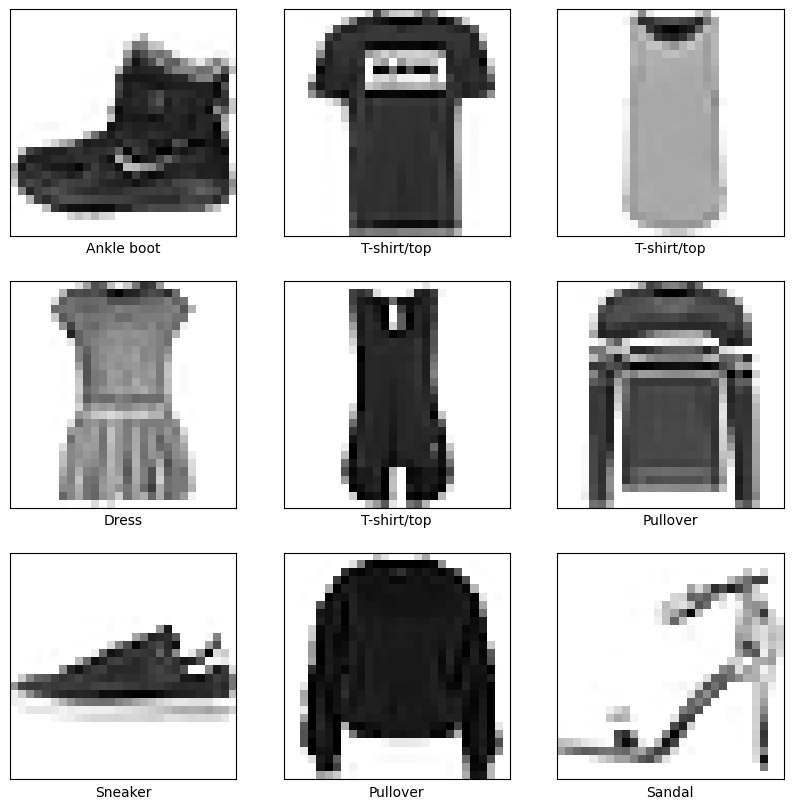

In [13]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Multi-Class Classification Model Architecture
+ Input shape 28 X 28
+ Output shape 10 (each neuron per class)
+ loss function (CategoricalCrossEntropy)
+ optimizer (Adam or SGD)
+ metrics (accuracy)
+ activation function in output layer (softmax)
+ activation function in hidden layer (relu)

In [14]:
model = tf.keras.Sequential(
    [
      tf.keras.Input(shape=(28,28)),
      tf.keras.layers.Flatten(),
    ]
)

model.output_shape

# convert the input layer to one 1D vector to proceed

(None, 784)

Loss Function: if we have label in one-hot representation than we have to used the **CategoricalCrossEntropy**
if the label values are in numberical form than we have to used the **SpraseCategoricalCrossEntropy**

In [15]:
tf.random.set_seed(42)
# ... (rest of the code, including model.fit) ...
model = tf.keras.Sequential(
    [
      tf.keras.Input(shape=(28,28)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense( 10, activation='softmax')
    ]
)
model.output_shape
# compiling of model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# fit model

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6879 - loss: 23.1217
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7844 - loss: 12.3404
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7908 - loss: 12.1318
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7955 - loss: 11.3262
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7978 - loss: 11.0359
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7999 - loss: 10.3229
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8019 - loss: 10.3988
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8031 - loss: 10.5682
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8047 - loss: 10.3653
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8057 - loss: 10.0937


### Label are one-hot representation:

In [16]:
# one-hot representation of lables
tf.random.set_seed(42)
# ... (rest of the code, including model.fit) ...
model = tf.keras.Sequential(
    [
      tf.keras.Input(shape=(28,28)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense( 4, activation='relu'),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense( 10, activation='softmax')
    ]
)
model.output_shape
# compiling of model
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# fit model

history = model.fit(train_images, tf.one_hot(train_labels,10),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0993 - loss: 2.3854
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0988 - loss: 2.3032
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0986 - loss: 2.3028
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0985 - loss: 2.3028
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0985 - loss: 2.3028
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028


In [17]:
tf.random.set_seed(42)
# ... (rest of the code, including model.fit) ...
model = tf.keras.Sequential(
    [
      tf.keras.Input(shape=(28,28)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense( 128, activation='relu'),
      tf.keras.layers.Dense( 10, activation='softmax')
    ]
)
model.output_shape
# compiling of model
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# fit model

history = model.fit(train_images, tf.one_hot(train_labels,10),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6788 - loss: 9.5065
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7587 - loss: 0.6967
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7716 - loss: 0.6188
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8070 - loss: 0.5516
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8168 - loss: 0.5340
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8216 - loss: 0.5258
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8287 - loss: 0.5178
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8321 - loss: 0.4953
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8345 - loss: 0.4958
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8345 - loss: 0.4973


### Normalization of Data using minmaxscaler method of sklearn


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Reshape train_images and test_images to 2D arrays
train_images = train_images.reshape(train_images.shape[0], -1) # Reshape to (60000, 784)
test_images = test_images.reshape(test_images.shape[0], -1) # Reshape to (10000, 784)


scaler = MinMaxScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Reshape back to original shape if needed for further processing
train_images = train_images.reshape(train_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)



tf.random.set_seed(42)
# ... (rest of the code, including model.fit) ...
model = tf.keras.Sequential(
    [
      tf.keras.Input(shape=(28,28)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense( 128, activation='relu'),
      tf.keras.layers.Dense( 10, activation='softmax')
    ]
)
model.output_shape
# compiling of model
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# fit model

history = model.fit(train_images, tf.one_hot(train_labels,10),epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7738 - loss: 0.6548 - val_accuracy: 0.8469 - val_loss: 0.4322
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8586 - loss: 0.4003 - val_accuracy: 0.8587 - val_loss: 0.3921
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8740 - loss: 0.3528 - val_accuracy: 0.8652 - val_loss: 0.3690
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8822 - loss: 0.3243 - val_accuracy: 0.8711 - val_loss: 0.3561
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8904 - loss: 0.3030 - val_accuracy: 0.8788 - val_loss: 0.3430
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8946 - loss: 0.2868 - val_accuracy: 0.8806 - val_loss: 0.3389
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9013 - loss: 0.2715 - val_accuracy: 0.8845 - val_loss: 0.3310
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9054 - loss: 0.2580 -

In [19]:
# model evaluation  =
model_evaluation = model.evaluate(test_images, tf.one_hot(test_labels,10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.3663


In [20]:
import pandas as pd

df = pd.DataFrame(history.history)
df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.819729,0.518074,0.846917,0.432242
1,0.860333,0.390943,0.858750,0.392110
2,0.874333,0.348192,0.865167,0.368957
3,0.882438,0.320960,0.871083,0.356121
4,0.890417,0.300063,0.878833,0.342965


<Axes: >

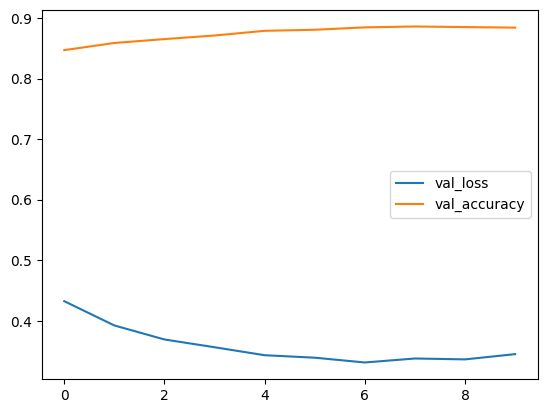

In [21]:
df[["val_loss","val_accuracy"]].plot()

<Axes: >

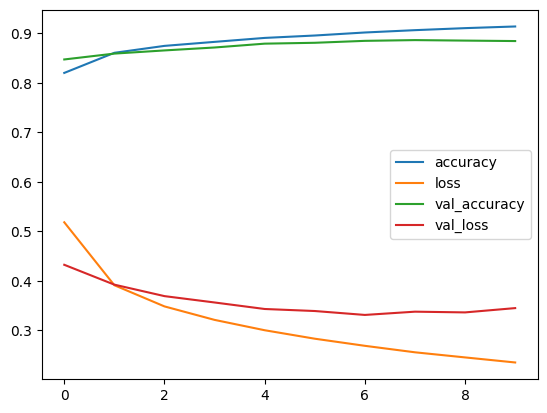

In [22]:
df.plot()

How To Find The Ideal Learning Rate

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Reshape train_images and test_images to 2D arrays
train_images = train_images.reshape(train_images.shape[0], -1) # Reshape to (60000, 784)
test_images = test_images.reshape(test_images.shape[0], -1) # Reshape to (10000, 784)


scaler = MinMaxScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Reshape back to original shape if needed for further processing
train_images = train_images.reshape(train_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)



tf.random.set_seed(42)
# ... (rest of the code, including model.fit) ...
model = tf.keras.Sequential(
    [
      tf.keras.Input(shape=(28,28)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense( 128, activation='relu'),
      tf.keras.layers.Dense( 10, activation='softmax')
    ]
)
# learning rate optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

# compiling of model
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics = ['accuracy']
)

# fit model

history = model.fit(train_images, tf.one_hot(train_labels,10),epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7635 - loss: 0.6681 - val_accuracy: 0.8400 - val_loss: 0.4562
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8434 - loss: 0.4386 - val_accuracy: 0.8524 - val_loss: 0.4198
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8528 - loss: 0.4068 - val_accuracy: 0.8485 - val_loss: 0.4226
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8604 - loss: 0.3905 - val_accuracy: 0.8463 - val_loss: 0.4280
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8630 - loss: 0.3845 - val_accuracy: 0.8510 - val_loss: 0.4423
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8655 - loss: 0.3762 - val_accuracy: 0.8502 - val_loss: 0.4329
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8685 - loss: 0.3675 - val_accuracy: 0.8547 - val_loss: 0.4373
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8702 - loss: 0.3591 - 

### Using Callback LearningRateScheduler

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Reshape train_images and test_images to 2D arrays
train_images = train_images.reshape(train_images.shape[0], -1) # Reshape to (60000, 784)
test_images = test_images.reshape(test_images.shape[0], -1) # Reshape to (10000, 784)


scaler = MinMaxScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

# Reshape back to original shape if needed for further processing
train_images = train_images.reshape(train_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)



tf.random.set_seed(42)
# ... (rest of the code, including model.fit) ...
model = tf.keras.Sequential(
    [
      tf.keras.Input(shape=(28,28)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense( 128, activation='relu'),
      tf.keras.layers.Dense( 10, activation='softmax')
    ]
)
# learning rate optimizer
def scheuler(epoch,lr):
  return 0.001 * 10**(epoch//20)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheuler)


# compiling of model
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy'],
)

# fit model

history = model.fit(train_images, tf.one_hot(train_labels,10),epochs=60,validation_split=0.2, callbacks = [lr_schedule])

Epoch 1/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7736 - loss: 0.6554 - val_accuracy: 0.8468 - val_loss: 0.4348 - learning_rate: 0.0010
Epoch 2/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8584 - loss: 0.3951 - val_accuracy: 0.8658 - val_loss: 0.3755 - learning_rate: 0.0010
Epoch 3/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8738 - loss: 0.3482 - val_accuracy: 0.8752 - val_loss: 0.3506 - learning_rate: 0.0010
Epoch 4/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8830 - loss: 0.3200 - val_accuracy: 0.8772 - val_loss: 0.3493 - learning_rate: 0.0010
Epoch 5/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8905 - loss: 0.2995 - val_accuracy: 0.8783 - val_loss: 0.3390 - learning_rate: 0.0010
Epoch 6/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8952 - loss: 0.2837 - val_accuracy: 0.8802 - val_loss: 0.3371 - learning_rate: 0.0010
Epoch 7/60
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8994 - l

In [25]:
df = pd.DataFrame(history.history)
df.head()

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.819625,0.515858,0.846750,0.434761,0.001
1,0.861979,0.383678,0.865833,0.375530,0.001
2,0.875354,0.341685,0.875250,0.350594,0.001
3,0.884771,0.316138,0.877167,0.349307,0.001
4,0.891667,0.295953,0.878333,0.339020,0.001


Text(0.5, 1.0, 'Ideal Learning Rate')

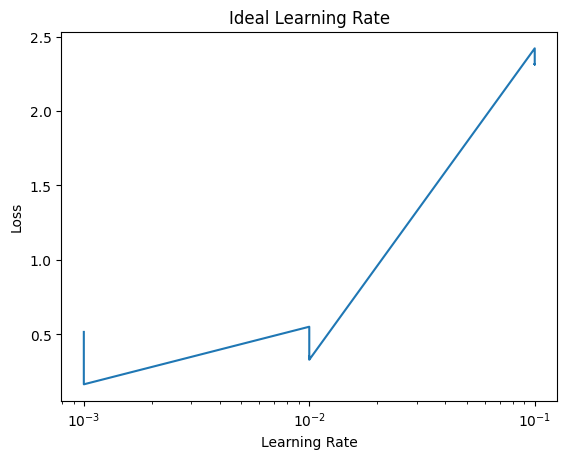

In [26]:
plt.semilogx(df["learning_rate"],df["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Ideal Learning Rate")


In [27]:
 #  the ideal learning rate is 0.001 in which the loss get decrease the more

In [28]:
# with ideal learning rate
tf.random.set_seed(42)
model = tf.keras.Sequential(
    [
      tf.keras.Input(shape=(28,28)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense( 128, activation='relu'),
      tf.keras.layers.Dense( 10, activation='softmax')
    ]
)


model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy'],
)


history = model.fit(train_images, tf.one_hot(train_labels,10),epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7710 - loss: 0.6550 - val_accuracy: 0.8427 - val_loss: 0.4427
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8578 - loss: 0.3989 - val_accuracy: 0.8577 - val_loss: 0.3929
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8746 - loss: 0.3512 - val_accuracy: 0.8664 - val_loss: 0.3697
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8844 - loss: 0.3212 - val_accuracy: 0.8744 - val_loss: 0.3511
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8897 - loss: 0.3010 - val_accuracy: 0.8755 - val_loss: 0.3480
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8954 - loss: 0.2839 - val_accuracy: 0.8798 - val_loss: 0.3403
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9001 - loss: 0.2690 - val_accuracy: 0.8832 - val_loss: 0.3307
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9041 - loss: 0.2556 - 

### Model Evaluation

In [29]:
model_evaluation = model.evaluate(test_images, tf.one_hot(test_labels,10))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8763 - loss: 0.4298


In [30]:
predictions = model.predict(test_images).argmax(axis=1)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

### Calculate the loss function of the model using the categoricalcrossentroyp and sparecategoricalcrossentropy loss functions
+ SPARCECATEGRORICALCROSSENTROPY IS USED WHEN THE PRDICTE VALUE IS INTEGER
+ CATEGROICALCROSSENTROPY IS USED WHEN THE PREDICTED VALUE IS IN ONE HOT ENCODED FORM

In [31]:
cce = tf.keras.losses.CategoricalCrossentropy()
cce(tf.one_hot(test_labels,10), model.predict(test_images) )

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.42395392060279846>

In [32]:
sce = tf.keras.losses.SparseCategoricalCrossentropy()
sce(test_labels, model.predict(test_images)).numpy()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.4239545

Accuracy of the model using the accuracy method of the tensorflow

In [33]:
# accuracy of the model
tf.keras.metrics.Accuracy()(test_labels, predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8758000135421753>

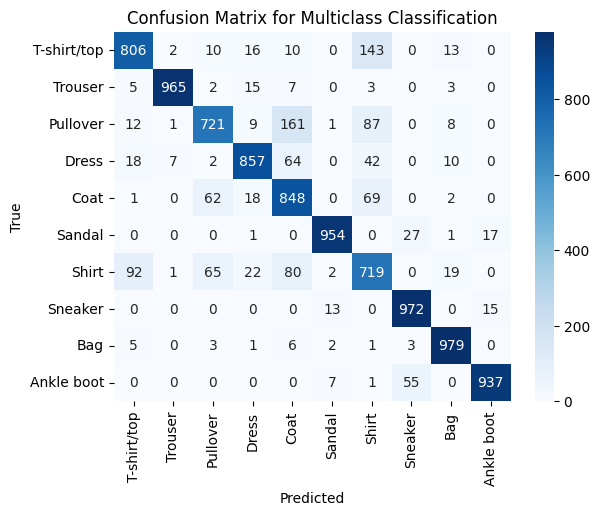

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Multiclass Classification')
plt.show()


+ Plot a random Image
+ Label the plot with true label and predicted label



In [35]:
def plot_random_image():
  random = np.random.randint(0,len(test_images))
  # plt.figure(figsize=(10,10))
  plt.imshow(test_images[random], cmap=plt.cm.binary)
  plt.xlabel(f"True: {class_names[test_labels[random]]}, Pred: {class_names[predictions[random]]}")
  # return random


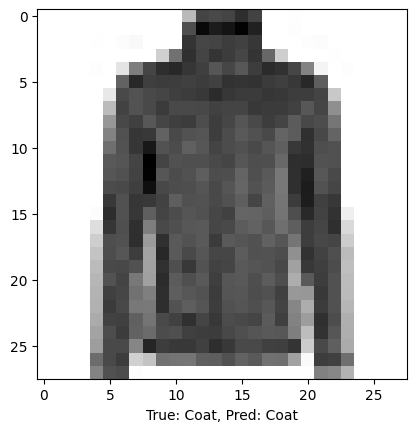

In [36]:
plot_random_image()

In [37]:
model.layers

[<Flatten name=flatten_7, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>]

In [38]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

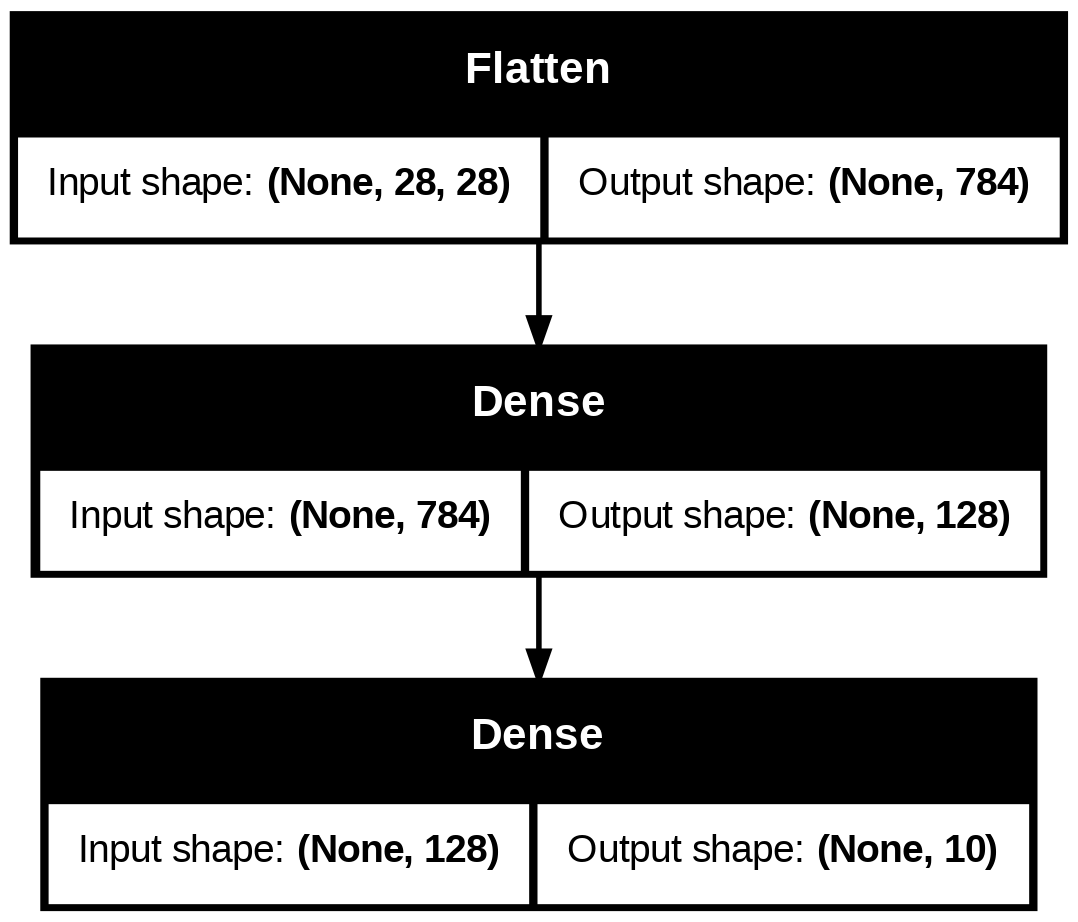

In [39]:
from  tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [41]:
weights, biase = model.layers[1].get_weights()

In [47]:
weights.shape

(784, 128)